# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fikri Wahidin
- **Email:** fikriayam4@gmail.com
- **ID Dicoding:** fikriwahidin

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penggunaan sepeda sepanjang tahun? Apakah ada pola tertentu berdasarkan musim atau bulan?
- Bagaimana kondisi cuaca dan temperatur mempengaruhi jumlah penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Fikri645/Proyek-Analisis-Data-Dicoding/main/data/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/Fikri645/Proyek-Analisis-Data-Dicoding/main/data/hour.csv')

In [4]:
# day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# hour.csv
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Informasi atribut:

hour.csv and day.csv mempunyai field sebagai berikut, kecuali hr yang tidak ada di day.csv
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai dataframe day

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat 16 kolom and 731 baris dalam dataframe day_df.

In [7]:
# Cek duplikasi dan missing values
print("Missing values pada tiap kolom pada dataframe day_df: ")
print(day_df.isna().sum())
print("Jumlah duplikasi dataframe day: ", day_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe day:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai dataframe hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat 17 kolom and 17379 baris dalam dataframe hour_df.

In [10]:
# Cek duplikasi dan missing values
print("Missing values pada tiap kolom pada dataframe hour: ")
print(hour_df.isna().sum())
print("Jumlah duplikasi dataframe hour: ", hour_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe hour: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe hour:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataframe day dan hour berada dalam kondisi yang baik untuk dianalisis:

*   Tidak ditemukan missing values di kedua dataframe.
*   Tidak ada keanehan nilai pada kedua dataframe.
*   Tipe data sesuai untuk sebagian besar kolom, namun kolom dteday, yang mewakili tanggal, berada dalam tipe objek dan harus dikonversi ke datetime untuk memudahkan manipulasi.

#### Memutuskan dataframe mana yang akan dipilih

Sebelumnya kita bisa lihat bahwa terdapat data tanggal yang sama pada kedua dataframe. Kita akan cek apakah dataframe hour_df, merupakan data lengkap perjam dari dataframe day_df.

Sebelumnya kita tau bahwa terdapat 731 baris data pada dataframe day_df, sekarang akan kita kelompokkan baris data dataframe hour_df berdasarkan tanggal, kemudian kita jumlahkan cnt pada setiap kelompok data.

In [12]:
hour_df.groupby('dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Bisa kita lihat bahwa setelah dikelompokkan berdasarkan tanggal, jumlah baris datanya sama seperti dataframe day_df, yaitu 731. Dan jumlah cnt hour_df setelah dikelompokkan per tanggal, juga sama dengan dataframe day_df.

In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Jadi, kita akan gunakan dataframe hour_df untuk sebagian besar proses analisis data.

### Cleaning Data

In [14]:
# Konversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Untuk mempermudah analisis data, kita akan lakukan rename terhadap beberapa kolom pada kedua dataframe.

In [15]:
kolom_day_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
day_df.rename(columns=kolom_day_rename, inplace=True)

kolom_hour_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
hour_df.rename(columns=kolom_hour_rename, inplace=True)

Kemudian kita akan mengubah type data pada kolom season, year, month, hour, holiday, weekday, workingday, dan weather menjadi category.

In [16]:
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

In [17]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

Kemudian kita akan mengubah nilai pada kolom season, year, month, holiday, weekday, workingday, dan weather menjadi kategori yang bersesuaian.

In [18]:
day_df['season'] = day_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df['year'] = day_df['year'].map({0: 2011, 1: 2012})
day_df['month'] = day_df['month'].apply(lambda x: calendar.month_name[x])
day_df['holiday'] = day_df['holiday'].map({0: 'no', 1: 'yes'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
day_df['workingday'] = day_df['workingday'].map({0: 'no', 1: 'yes'})

hour_df['season'] = hour_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['year'] = hour_df['year'].map({0: 2011, 1: 2012})
hour_df['month'] = hour_df['month'].apply(lambda x: calendar.month_name[x])
hour_df['holiday'] = hour_df['holiday'].map({0: 'no', 1: 'yes'})
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'no', 1: 'yes'})

Kemudian kita akan mengembalikan nilai temperature, atemp, hum, dan windspeed yang telah dinormalisasi.

In [19]:
# Mengembalikan nilai temperature, atemp, hum, dan windspeed ke skala aslinya
day_df['temperature'] = day_df['temperature'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['humidity'] = day_df['humidity'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

hour_df['temperature'] = hour_df['temperature'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['humidity'] = hour_df['humidity'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [20]:
print(day_df.head())
print(hour_df.head())

   instant       date    season  year    month holiday weekday workingday  \
0        1 2011-01-01  springer  2011  January      no     Sat         no   
1        2 2011-01-02  springer  2011  January      no     Sun         no   
2        3 2011-01-03  springer  2011  January      no     Mon        yes   
3        4 2011-01-04  springer  2011  January      no     Tue        yes   
4        5 2011-01-05  springer  2011  January      no     Wed        yes   

  weather  temperature     atemp  humidity  windspeed  casual  registered  \
0       2    14.110847  18.18125   80.5833  10.749882     331         654   
1       2    14.902598  17.68695   69.6087  16.652113     131         670   
2       1     8.050924   9.47025   43.7273  16.636703     120        1229   
3       1     8.200000  10.60610   59.0435  10.739832     108        1454   
4       1     9.305237  11.46350   43.6957  12.522300      82        1518   

   total  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
   insta

In [21]:
print(day_df.describe())
print(hour_df.describe())

          instant  temperature       atemp    humidity   windspeed  \
count  731.000000   731.000000  731.000000  731.000000  731.000000   
mean   366.000000    20.310776   23.717699   62.789406   12.762576   
std    211.165812     7.505091    8.148059   14.242910    5.192357   
min      1.000000     2.424346    3.953480    0.000000    1.500244   
25%    183.500000    13.820424   16.892125   52.000000    9.041650   
50%    366.000000    20.431653   24.336650   62.666700   12.125325   
75%    548.500000    26.872076   30.430100   73.020850   15.625371   
max    731.000000    35.328347   42.044800   97.250000   34.000021   

            casual   registered        total  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.00

## Exploratory Data Analysis (EDA)

### Explore ...

Mengetahui jumlah pengguna rental sepeda berdasarkan kelompok musim.

In [22]:
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
springer,60622,410726,471348


Mengetahui jumlah pengguna rental sepeda berdasarkan kelompok bulan.

In [23]:
hour_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Mengetahui jumlah pengguna rental sepeda berdasarkan kelompok cuaca.

In [24]:
hour_df.groupby(by="weather").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
weather,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


Mengetahui jumlah pengguna rental sepeda berdasarkan kelompok jam.

In [25]:
hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Mengetahui jumlah pengguna rental sepeda berdasarkan kelompok harian.

In [26]:
hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
weekday,,,
Fri,78238,409552,487790
Thu,61460,423935,485395
Sat,153852,323955,477807
Wed,57319,415729,473048
Tue,57843,411266,469109
Mon,70784,384719,455503
Sun,140521,303506,444027


Mengetahui jumlah pengguna rental sepeda berdasarkan hari libur / tidak.

In [27]:
hour_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


Mencari korelasi antara total dengan atribut lainnya.

In [28]:
correlation_with_total = day_df.corr()['total'].sort_values(ascending=False)

correlation_with_total

<ipython-input-28-07a73f0466eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_total = day_df.corr()['total'].sort_values(ascending=False)


total          1.000000
registered     0.945517
casual         0.672804
atemp          0.631066
instant        0.628830
temperature    0.627494
humidity      -0.100659
windspeed     -0.234545
Name: total, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend penggunaan sepeda sepanjang tahun? Apakah ada pola tertentu berdasarkan musim atau bulan?

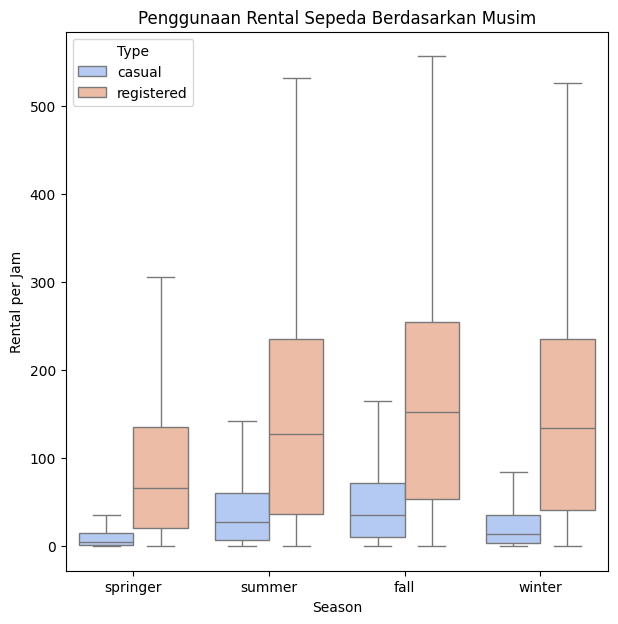

In [29]:
plt.figure(figsize=(7, 7))
df = hour_df[['season','casual','registered']]
sns.boxplot(data = pd.melt(df,id_vars='season', var_name='Type',value_name= 'Rental per Jam'), x='season', y= 'Rental per Jam', hue='Type', showfliers=False, palette='coolwarm')
plt.title('Penggunaan Rental Sepeda Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Rental per Jam')
plt.show()



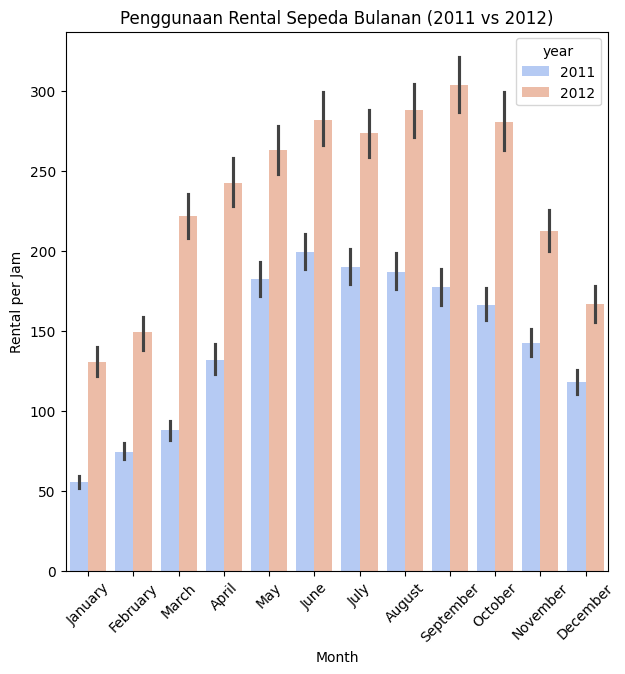

In [30]:
plt.figure(figsize=(7, 7))
sns.barplot(data=hour_df, x='month', y='total', hue='year', palette='coolwarm')
plt.title('Penggunaan Rental Sepeda Bulanan (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Rental per Jam')
plt.xticks(rotation=45)

plt.show()

Rata-rata Total Rental Sepeda berdasarkan Musim (Season):

Boxplot menunjukkan bahwa rental sepeda mencapai puncaknya selama musim gugur, diikuti dengan erat oleh musim panas. Musim dingin dan musim semi menunjukkan rata-rata yang jauh lebih rendah, menunjukkan preferensi yang jelas untuk bersepeda selama bulan-bulan yang lebih hangat.

Rata-rata Total Rental Sepeda berdasarkan Bulan:

Barplot menunjukkan puncak pengguna yang jelas pada bulan-bulan yang lebih hangat, baik pada tahun 2011 maupun tahun 2012. Ada peningkatan yang terlihat mulai dari bulan Maret, mencapai puncaknya pada bulan-bulan musim panas, dan kemudian penurunan bertahap menuju akhir tahun. Trend bulanan ini menegaskan dampak kuat cuaca dan perubahan musiman pada perilaku penyewaan sepeda.

### Pertanyaan 2: Bagaimana kondisi cuaca dan temperatur mempengaruhi jumlah penggunaan sepeda?

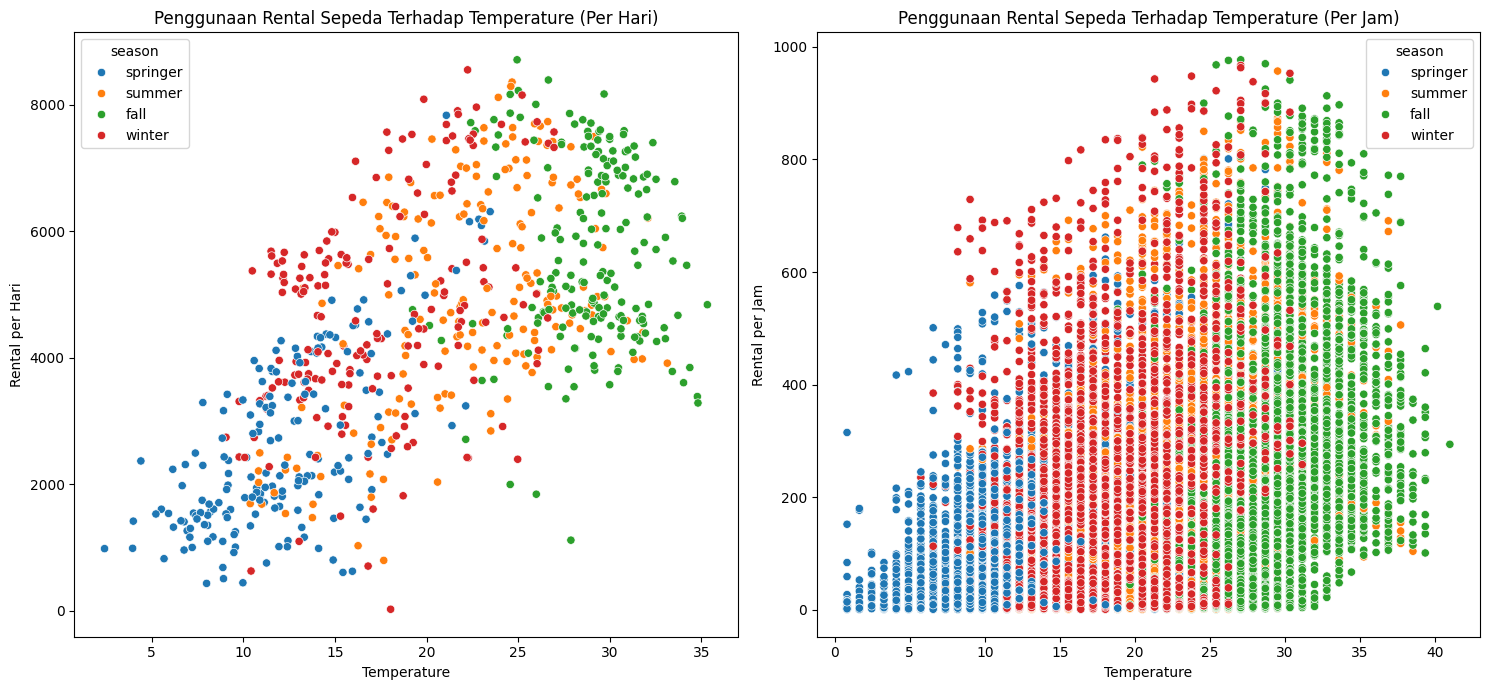

In [31]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=day_df, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Hari)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Hari')

plt.subplot(1, 2, 2)
sns.scatterplot(data=hour_df, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Jam)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Jam')

plt.tight_layout()
plt.show()

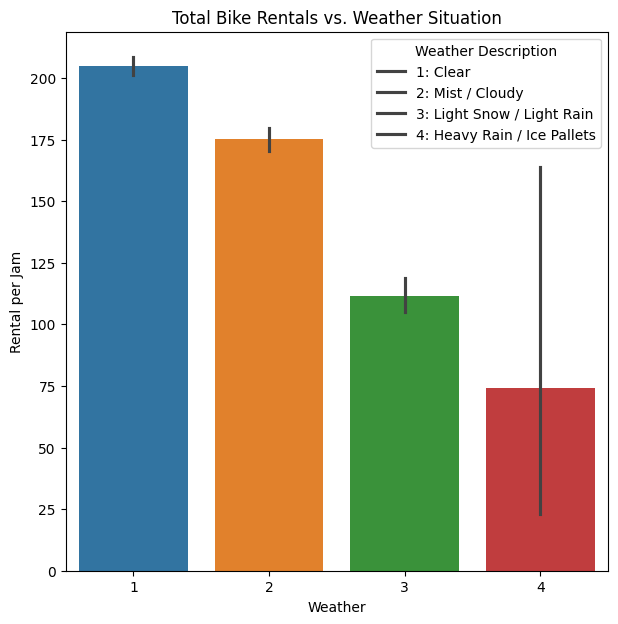

In [32]:
legend_labels = {
    1: 'Clear',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Light Rain',
    4: 'Heavy Rain / Ice Pallets'
}
plt.figure(figsize=(7, 7))
sns.barplot(data=hour_df, x='weather', y='total', hue='weather')
plt.title('Total Bike Rentals vs. Weather Situation')
plt.xlabel('Weather')
plt.ylabel('Rental per Jam')
plt.legend(title='Weather Description', labels=[f'{key}: {value}' for key, value in legend_labels.items()], loc='upper right')

plt.show()

Rata-rata Total Rental Sepeda berdasarkan Suhu (temperature):

Terdapat tren positif yang jelas menunjukkan bahwa seiring dengan peningkatan suhu, jumlah total penyewaan sepeda juga meningkat. Hubungan ini konsisten di berbagai musim, dengan musim yang lebih hangat seperti musim panas (summer) dan musim gugur (fall) menunjukkan jumlah penyewaan yang lebih tinggi pada suhu yang sebanding.


Rata-rata Total Rental Sepeda berdasarkan Cuaca (weather):

Rata-rata total penyewaan mengalami penurunan saat situasi cuaca memburuk (dari 1 hingga 3, di mana 1 adalah cuaca terbaik dan 3 adalah salju ringan atau hujan ringan).

## Conclusion

### Conclution pertanyaan 1
Analisis Musiman (Season) mengkonfirmasi bahwa pola sewa sepeda sangat dipengaruhi oleh perubahan musiman, dengan preferensi yang jelas untuk bulan-bulan yang lebih hangat.
### Conclution pertanyaan 2
Analisis ini menyoroti dampak kritis faktor terkait cuaca dan temperatur terhadap pola rental sepeda. Suhu memiliki pengaruh yang signifikan terhadap jumlah total rental sepeda, dengan adanya tren positif yang menunjukkan peningkatan jumlah rental sepeda seiring dengan peningkatan suhu. Selain itu, situasi cuaca juga memengaruhi jumlah rental sepeda, dengan penurunan jumlah penyewaan saat cuaca memburuk.


Oleh karena itu, faktor waktu (musiman dan bulanan), suhu, dan cuaca dapat dijadikan prediktor penting dalam memperkirakan permintaan rental sepeda di masa depan.

In [33]:
# Convert dataframe menjadi csv
day_df.to_csv('day_df.csv', index=False)
hour_df.to_csv('hour_df.csv', index=False)